<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos · PEC2</p>
<p style="margin: 0; text-align:right;">2021-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Visualización PEC 2

<div class="alert alert-block alert-info">
<strong>Nombre y apellidos: Pablo Martínez Pavón</strong>
</div>

## Visualización 1. Pie Chart

[Fuente datos: **Instituto Galego de Estatística (IGE)**](https://www.ige.gal/web/mostrar_actividade_estatistica.jsp?idioma=gl&codigo=0201001002)

Con esta visualización buscamos responder a la pregunta __¿Cúal es la mayor provincia gallega en términos de población?__

En la actualidad, la ciudad más grande de Galicia es Vigo, por lo que por lo general mucha gente cree que Pontevedra es la provinica en la que viven más personas, pero ¿es esto así?

In [1]:
import pandas as pd

#leer datos
dataset=pd.read_excel("C:/Users/pablo/Desktop/VISUALIZACIONPEC2/Dataset1.xlsx")

In [2]:
#mostrar
dataset

,Provincia,Total,Homes,Mulleres
0,A Coruña,1120134,537004,583130
1,Lugo,326013,157892,168121
2,Ourense,305223,146495,158728
3,Pontevedra,944275,455910,488365


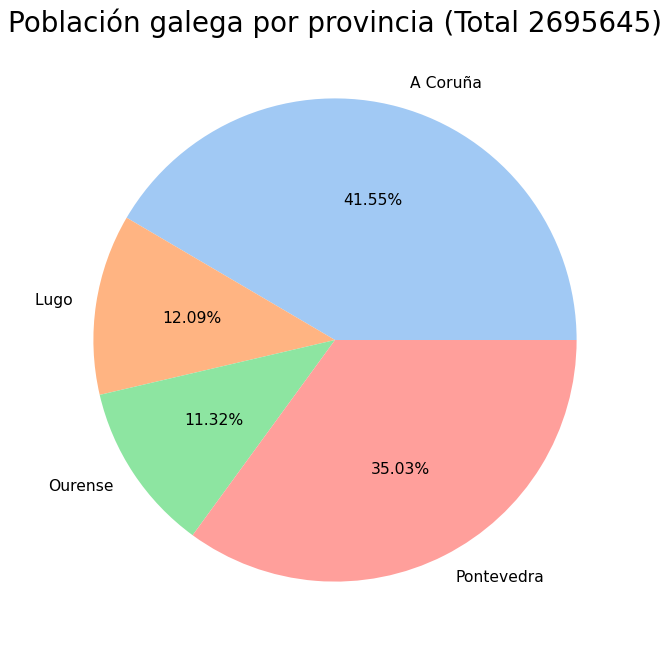

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#pie chart
plt.figure(figsize=(10, 10), dpi=80)
plt.title("Población galega por provincia (Total %.0f)" %(dataset["Total"].sum()),fontsize=25)
colors = sns.color_palette('pastel')[0:4]
plt.pie(dataset["Total"], labels = dataset["Provincia"], 
        colors = colors, autopct='%.2f%%',textprops={'fontsize': 14})
plt.show()

## Visualización 2. Alluvial Diagram

[Fuente datos: **AENA**](https://www.aena.es/es/estadisticas/consultas-personalizadas.html)

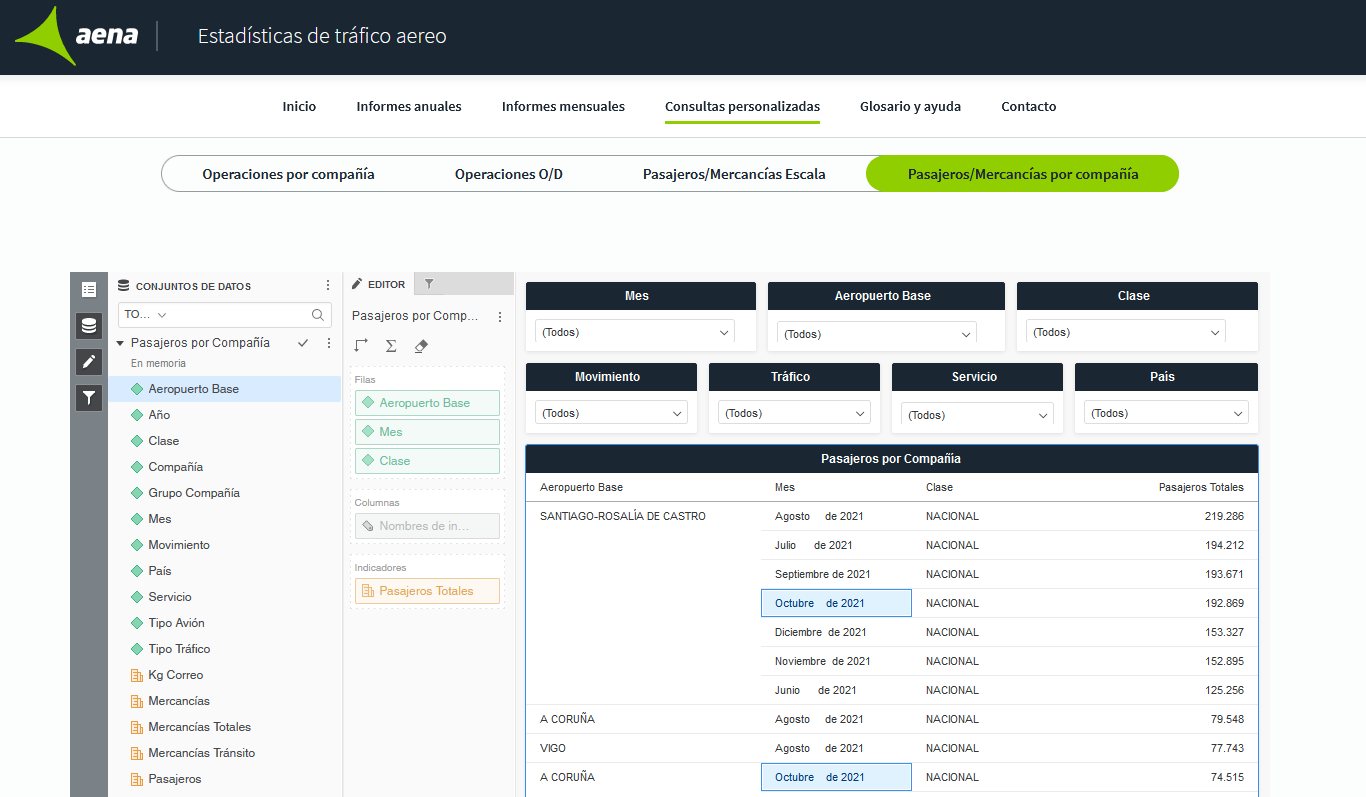

Con esta visualización buscamos **caracterizar el tráfico aéreo por número de pasajeros de los aeropuertos galegos**, pudiendo responder así a diferentes preguntas: 
- _¿Cúal es el aeropuerto con mayor tráfico?_
- _¿Que mes es el que presenta un mayor trasiego de pasajeros?_
- _¿A dónde viajan principalmente los usuarios de estos aeropuertos?_


In [4]:
#leer datos
dataset2=pd.read_excel("C:/Users/pablo/Desktop/VISUALIZACIONPEC2/Dataset2.xlsx")

In [5]:
dataset2

,Aeropuerto Base,Mes,Clase,Pasajeros Totales
0,SANTIAGO-ROSALÍA DE CASTRO,Abril,NACIONAL,33592
1,VIGO,Abril,NACIONAL,26395
2,A CORUÑA,Abril,NACIONAL,25939
3,SANTIAGO-ROSALÍA DE CASTRO,Abril,SCHENGEN NO UE,4533
4,SANTIAGO-ROSALÍA DE CASTRO,Abril,EUROPA NO UE NO SHENGEN,86
...,...,...,...,...
168,A CORUÑA,Septiembre,INTERNACIONAL,12
169,A CORUÑA,Septiembre,SCHENGEN NO UE,8
170,VIGO,Septiembre,SCHENGEN NO UE,6
171,VIGO,Septiembre,INTERNACIONAL,3


In [14]:
import plotly

def genAlluvial(df,cat_cols=[],value_cols=''):
    
    # https://medium.com/kenlok/how-to-create-sankey-diagrams-from-dataframes-in-python-e221c1b4d6b0
    # https://plotly.com/python/sankey-diagram/
    
    colores = ['#4B8BBE','#FFE873','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
    
    # asignar mismos colores a cada nivel
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colores[idx]]*colorNum
    #print(colorList)
        
    # crear links entre source y objetivo
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "red",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = 'Pasajeros en los aeropuertos de Galicia para el año 2021',
        font = dict(
          size = 15
        )
    )
       
    return dict(data=[data], layout=layout)

fig=genAlluvial(dataset2,cat_cols=['Aeropuerto Base', 'Mes', 'Clase'],value_cols='Pasajeros Totales')

plotly.offline.plot(fig, validate=False,image = 'png', image_filename='plot_image',image_width=1500, image_height=800)

'temp-plot.html'

Como se genera un gráfico interactivo en HTML, también se ha añadido la posibilidad de guardarlo como una imagen estática en formato png. Esta es la que se muestra a continuación:

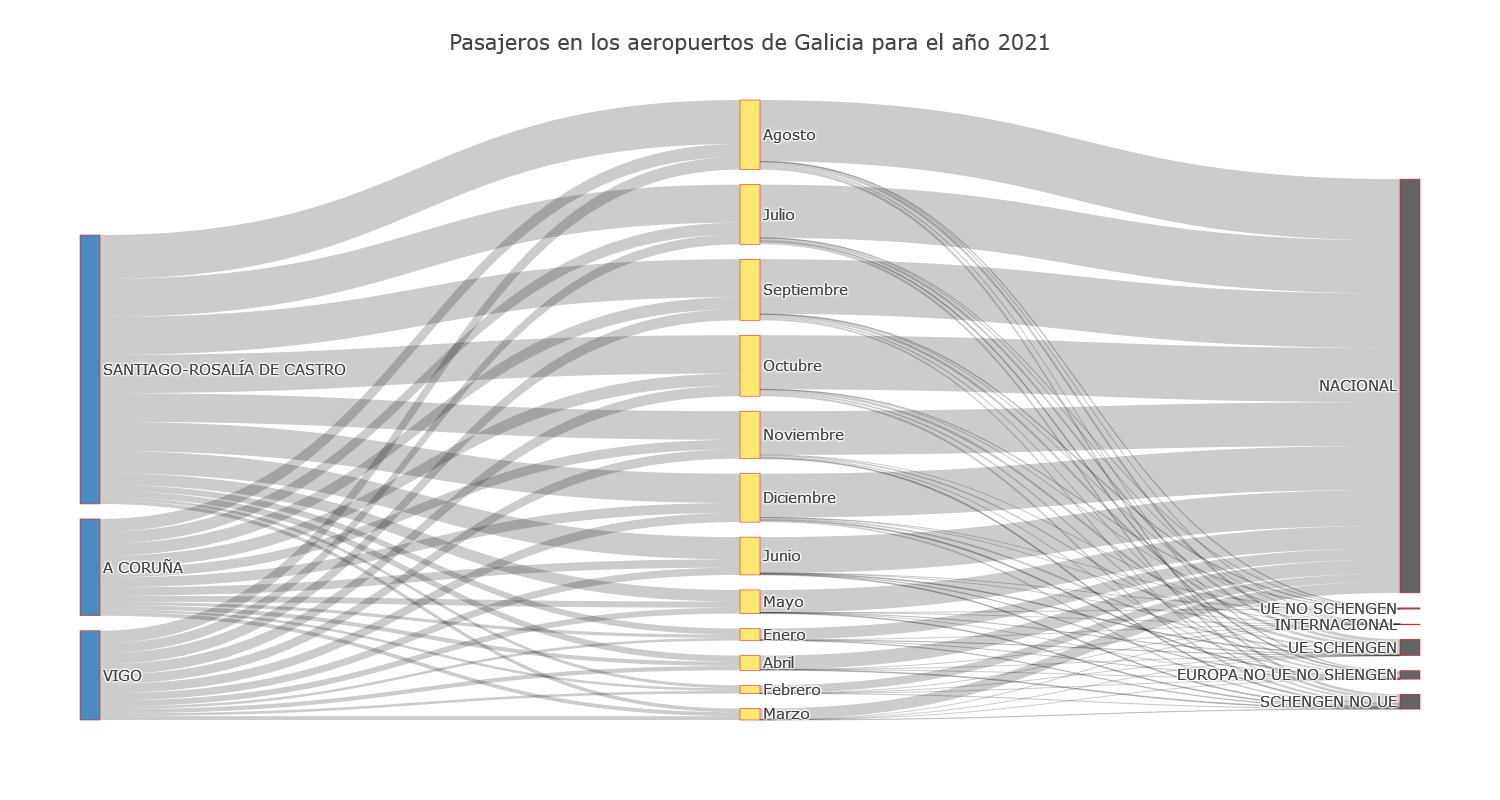

## Visualización 3. Rain Cloud Plot

[Fuente datos: **Kaggle**](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download)

En este caso, no ha sido posible encontrar un dataset interesante. Se ha usado un dataset similar a Iris que se ha encontrado en Kaggle.
Con esta visualización buscamos responder a la pregunta __¿Cúal es la especie de pingüino que presenta de media un mayor peso?__

Además en este caso, por la visualización empleada es posible comprobar la distribución de pesos para cada una de las especies de una manera fácil e intuitiva.

In [15]:
#leer datos
dataset3=pd.read_csv("C:/Users/pablo/Desktop/VISUALIZACIONPEC2/Dataset3.csv")

In [16]:
dataset3

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


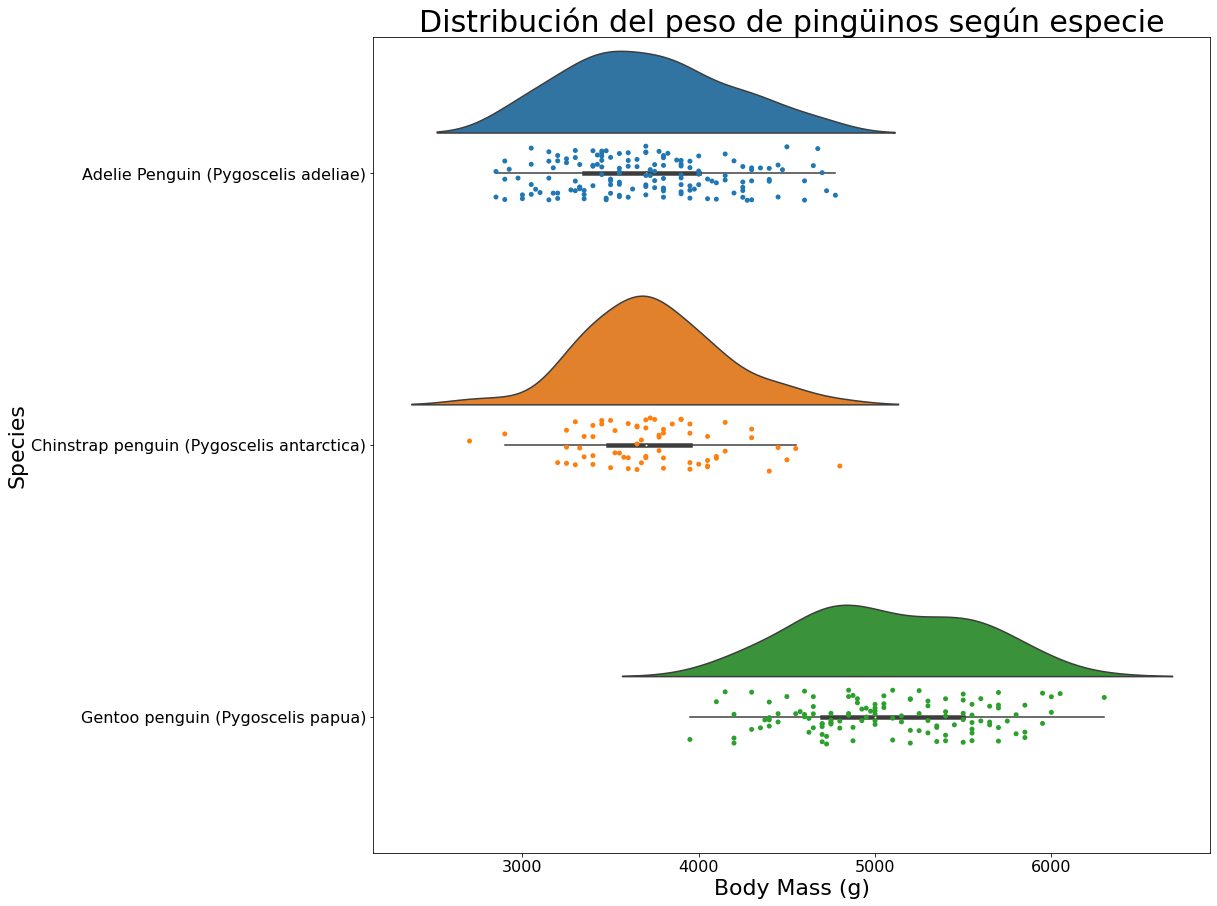

In [18]:
#https://levelup.gitconnected.com/a-comprehensive-data-visualization-using-raincloud-plots-120212e33197
#https://towardsdatascience.com/making-it-rain-with-raincloud-plots-496c39a2756f

import ptitprince as pt

f, ax = plt.subplots(figsize=(15,15))


ax.set_title('Distribución del peso de pingüinos según especie', size=30) 
ax = pt.half_violinplot( y = "Species", x = "Body Mass (g)", data =dataset3, width = .8)
ax = sns.stripplot(y = "Species", x = "Body Mass (g)", data = dataset3)

plt.rc('axes', labelsize=22)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)